# 项目：研究数据源——巴西预约挂号课题

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

In [138]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import csv
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
import matplotlib.pyplot as plt
% matplotlib inline
# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [139]:
# 加载数据并打印几行。进行这几项操作，来检查数据
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


in total 14 columns including ID, gender and age, schedule and appoint day, address, type of sickness, SMS reminder and show information

In [3]:
#   类型，以及是否有缺失数据或错误数据的情况。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#   Check detailed type for ScheduldedDay
type(df['ScheduledDay'][0])

str

In [5]:
#  Check detailed type for AppointmentDay
type(df['AppointmentDay'][0])

str

In [6]:
#   valid describitive statistic
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
sum(df.duplicated())

0

Good thing:no missing date for each colum, no duplicated data
There are some data type issue:
1. PatientId should be with int form
2. AppointmentDay and ScheduledDay should be in timestamp form 

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理（请用更具体的标题来代替该标题。）

In [111]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
# convert format of PatientId from float to int
df['PatientId']= pd.DataFrame(df['PatientId'],dtype=np.int)

In [105]:
# change AppointmentDay to datetime format

In [112]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'],format = '%Y-%m-%d')

In [106]:
# change ScheduledDay to datetime format

In [113]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'],format = '%Y-%m-%d')

In [114]:
# add column as Appointment_Weekday for further analysis
df['Appointment_Weekday']=df['AppointmentDay'].dt.weekday

In [14]:
# check changed data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId              110527 non-null int64
AppointmentID          110527 non-null int64
Gender                 110527 non-null object
ScheduledDay           110527 non-null datetime64[ns]
AppointmentDay         110527 non-null datetime64[ns]
Age                    110527 non-null int64
Neighbourhood          110527 non-null object
Scholarship            110527 non-null int64
Hipertension           110527 non-null int64
Diabetes               110527 non-null int64
Alcoholism             110527 non-null int64
Handcap                110527 non-null int64
SMS_received           110527 non-null int64
No-show                110527 non-null object
Appointment_Weekday    110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(3)
memory usage: 12.6+ MB


In [129]:
# add appointment weekday column for further analysis
df['day_interval']=(df['AppointmentDay']-df['ScheduledDay']).values/np.timedelta64(1,'D')
df['day_interval']=pd.DataFrame(df['day_interval'],dtype=np.int)

In [130]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_Weekday,day_interval
0,29872500000000,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,0
1,558998000000000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,0
2,4262960000000,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,0
3,867951000000,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,0
4,8841190000000,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,0


data format changed and columns added succesfully 

<a id='eda'></a>
## 探索性数据分析

### 研究问题 1 which can be the main factors for no show 

In [ ]:
# split data source with query
df_no = df[df['No-show'] == 'No']
df_yes= df[df['No-show'] == 'Yes']

Text(0.5,1,'Scatterplot of Appointment Weekday vs Show and No Show Patients')

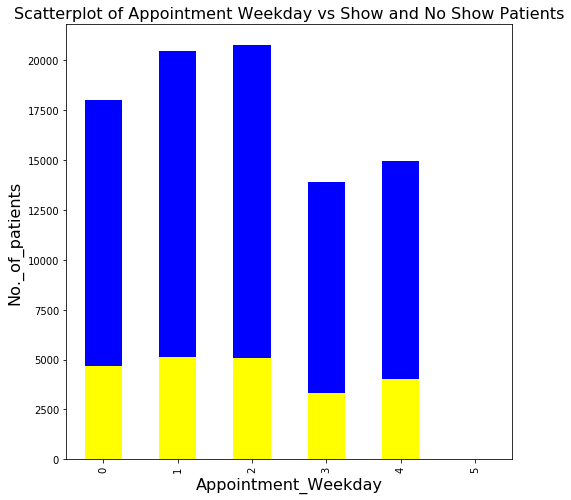

In [19]:
# to visulize relationship between appointment_weekday and no show
df_no.groupby(['Appointment_Weekday'],as_index='False')['PatientId'].count().plot(kind='bar',figsize=(8,8),color='blue')
df_yes.groupby(['Appointment_Weekday'],as_index='False')['PatientId'].count().plot(kind='bar',figsize=(8,8),color='yellow')
plt.xlabel('Appointment_Weekday',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Scatterplot of Appointment Weekday vs Show and No Show Patients", fontsize=16)

1.1.1 scheduled weekday is one of appointment peak factor, appointment peak time is Tuesday, Wed, 
1.1.2 scheduled weekday is Saturday has least appointment, but less no show risks.

Text(0.5,1,'Bar plot of Age vs Show and No Show Patients')

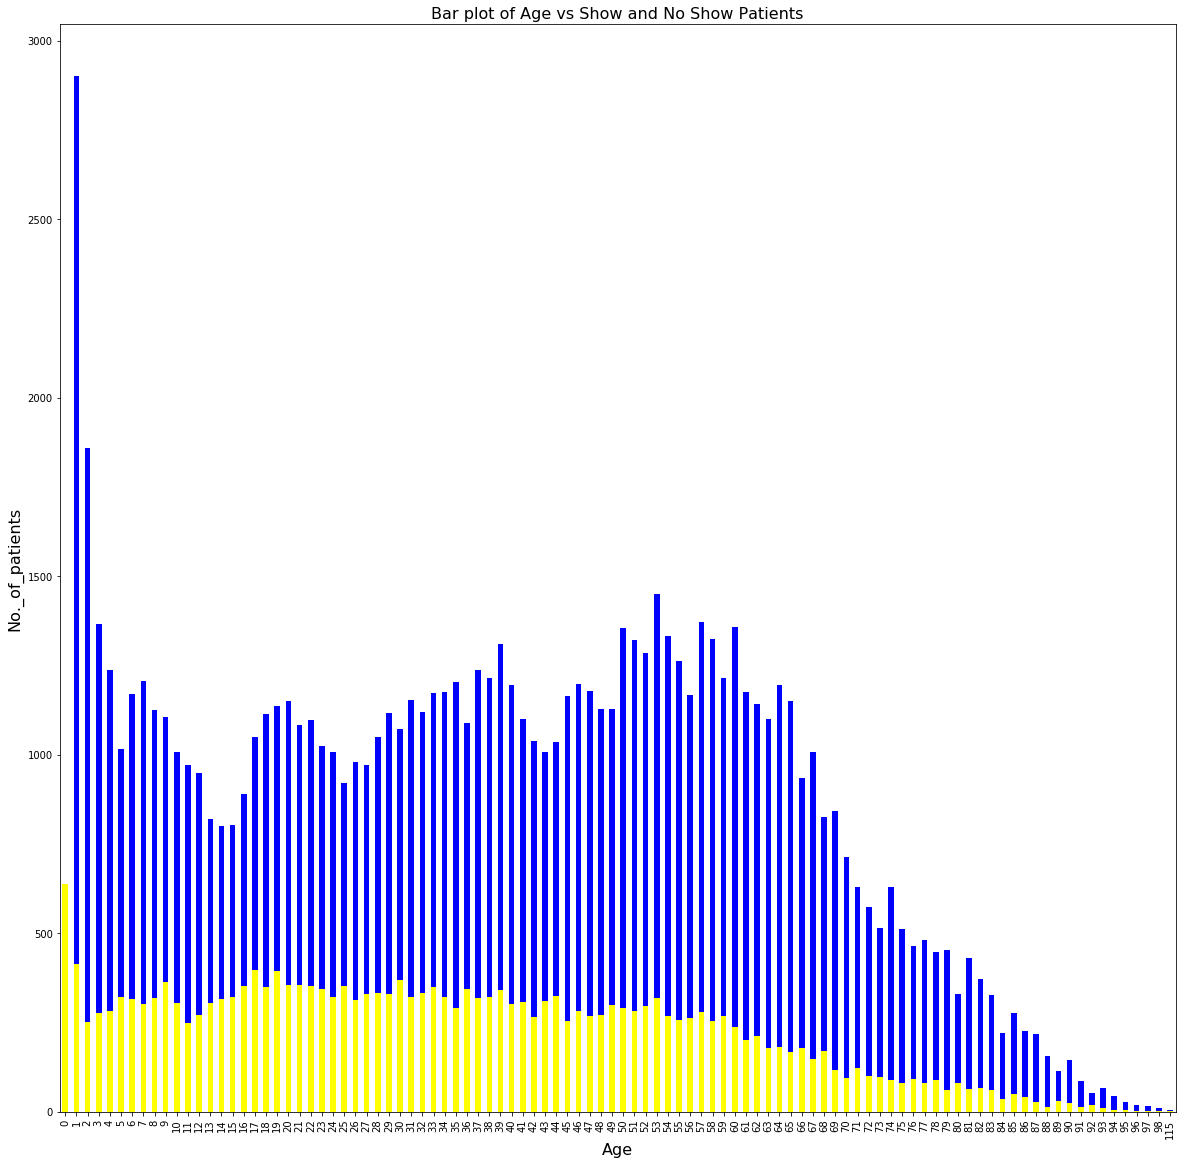

In [21]:
# to visulize relationship between age and no show
df_no.groupby(['Age'],as_index='False')['PatientId'].count().plot(kind='bar',figsize=(20,20),color='blue')
df_yes.groupby(['Age'],as_index='False')['PatientId'].count().plot(kind='bar',figsize=(20,20),color='yellow')
plt.xlabel('Age',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Bar plot of Age vs Show and No Show Patients", fontsize=16)

1.2.1 young people betwenn 18 to 40 has high no-show ratio than elder people(above 40)

Text(0.5,1,'Bar plot of Age vs Show and No Show Patients')

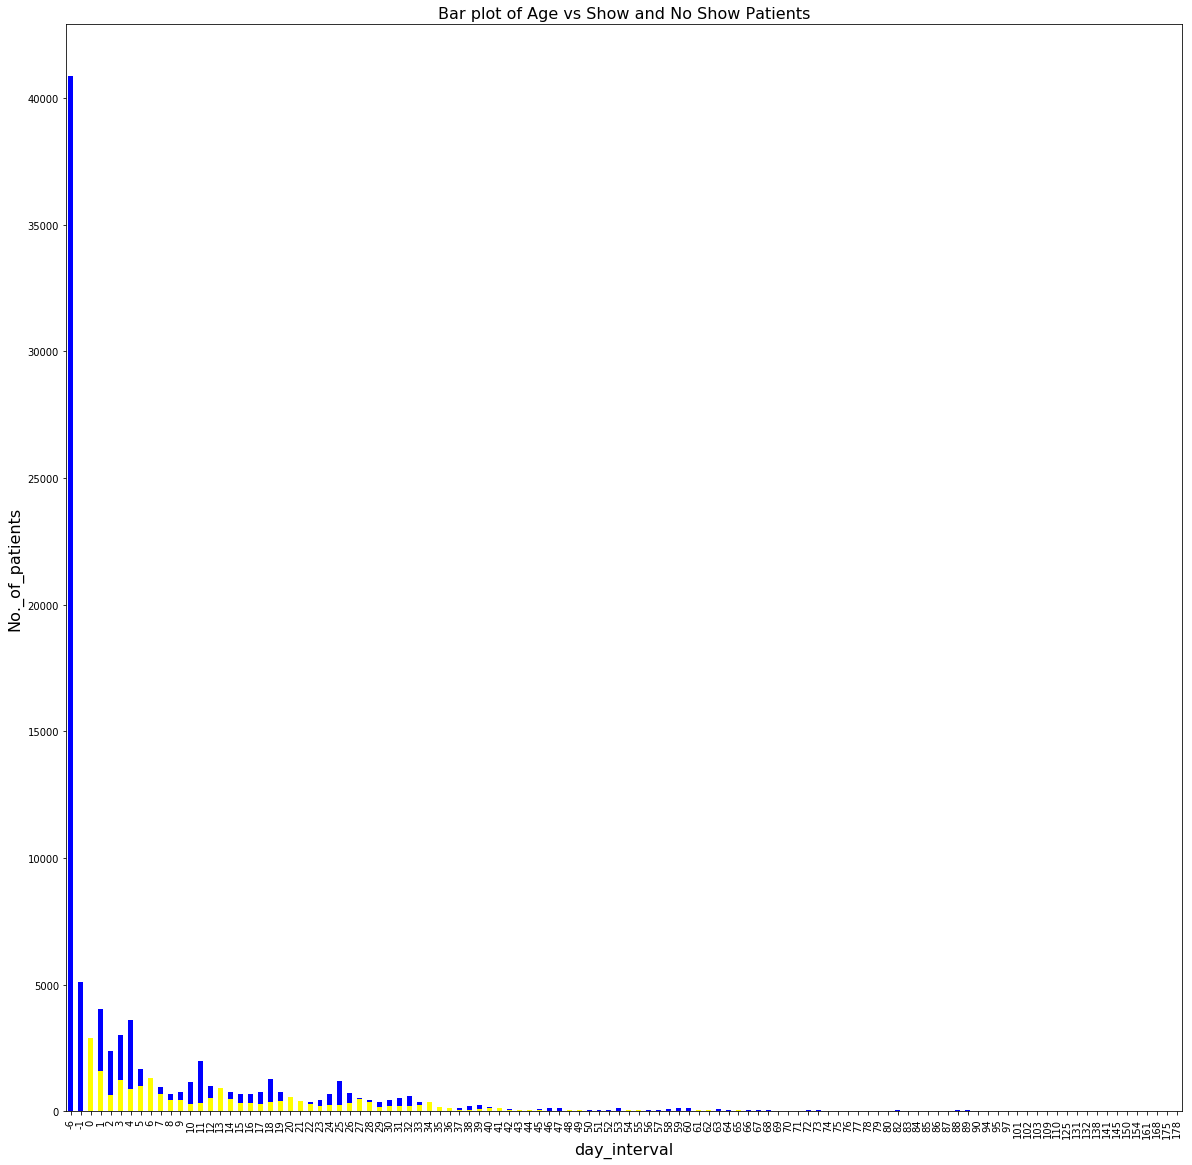

In [141]:
# to visulize relationship between appintment day in advance and no show
df_no.groupby(['day_interval'],as_index='False')['PatientId'].count().plot(kind='bar',figsize=(20,20),color='blue')
df_yes.groupby(['day_interval'],as_index='False')['PatientId'].count().plot(kind='bar',figsize=(20,20),color='yellow')
plt.xlabel('day_interval',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Bar plot of Age vs Show and No Show Patients", fontsize=16)

1.3.1 booking behavior has an impact on no show, people made appointment earlier in advance, will also have less no-show risks.

Text(0.5,1,'Barplot of Gender vs Show and No Show Patients')

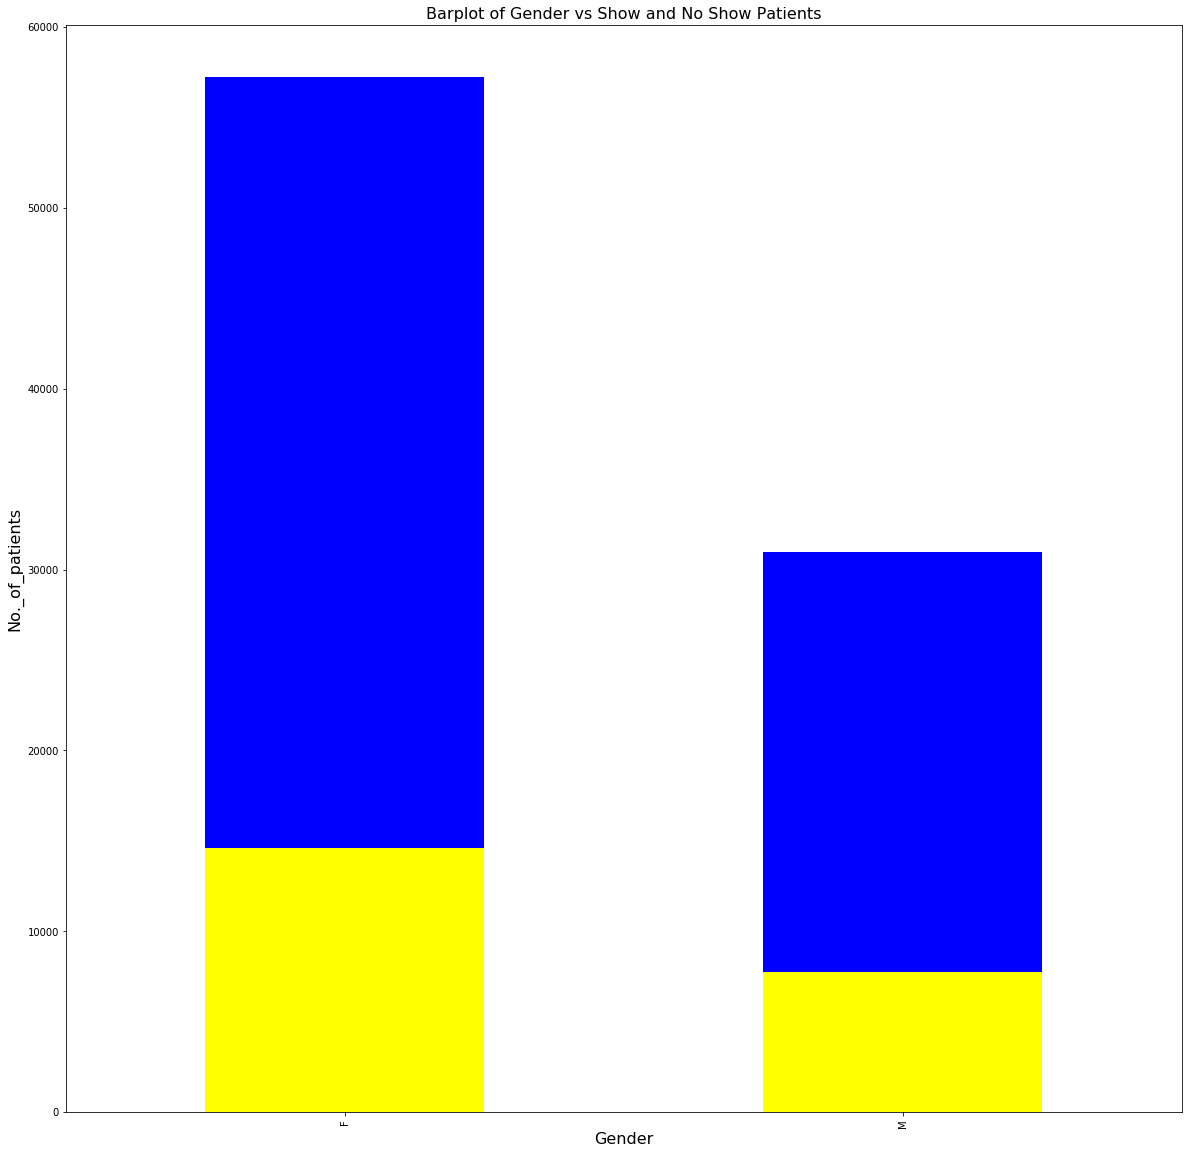

In [61]:
# to visulize relationship between gender and no show
df_no.groupby(['Gender'],as_index='False')['PatientId'].count().plot(kind='bar',figsize=(20,20),color='blue')
df_yes.groupby(['Gender'],as_index='False')['PatientId'].count().plot(kind='bar',figsize=(20,20),color='yellow')
plt.xlabel('Gender',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Barplot of Gender vs Show and No Show Patients", fontsize=16)

1.4.1 Female shares the same no-show rate as male

### 研究问题 2 what are main factors for different disease

In [66]:
# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
df_hi = df.query('Hipertension == "1"')
df_d = df.query('Diabetes == "1"')
df_a = df.query('Alcoholism == "1"')
df_ha = df.query('Handcap == "1"')

Text(0.5,1,'Pieplot of age vs disease')

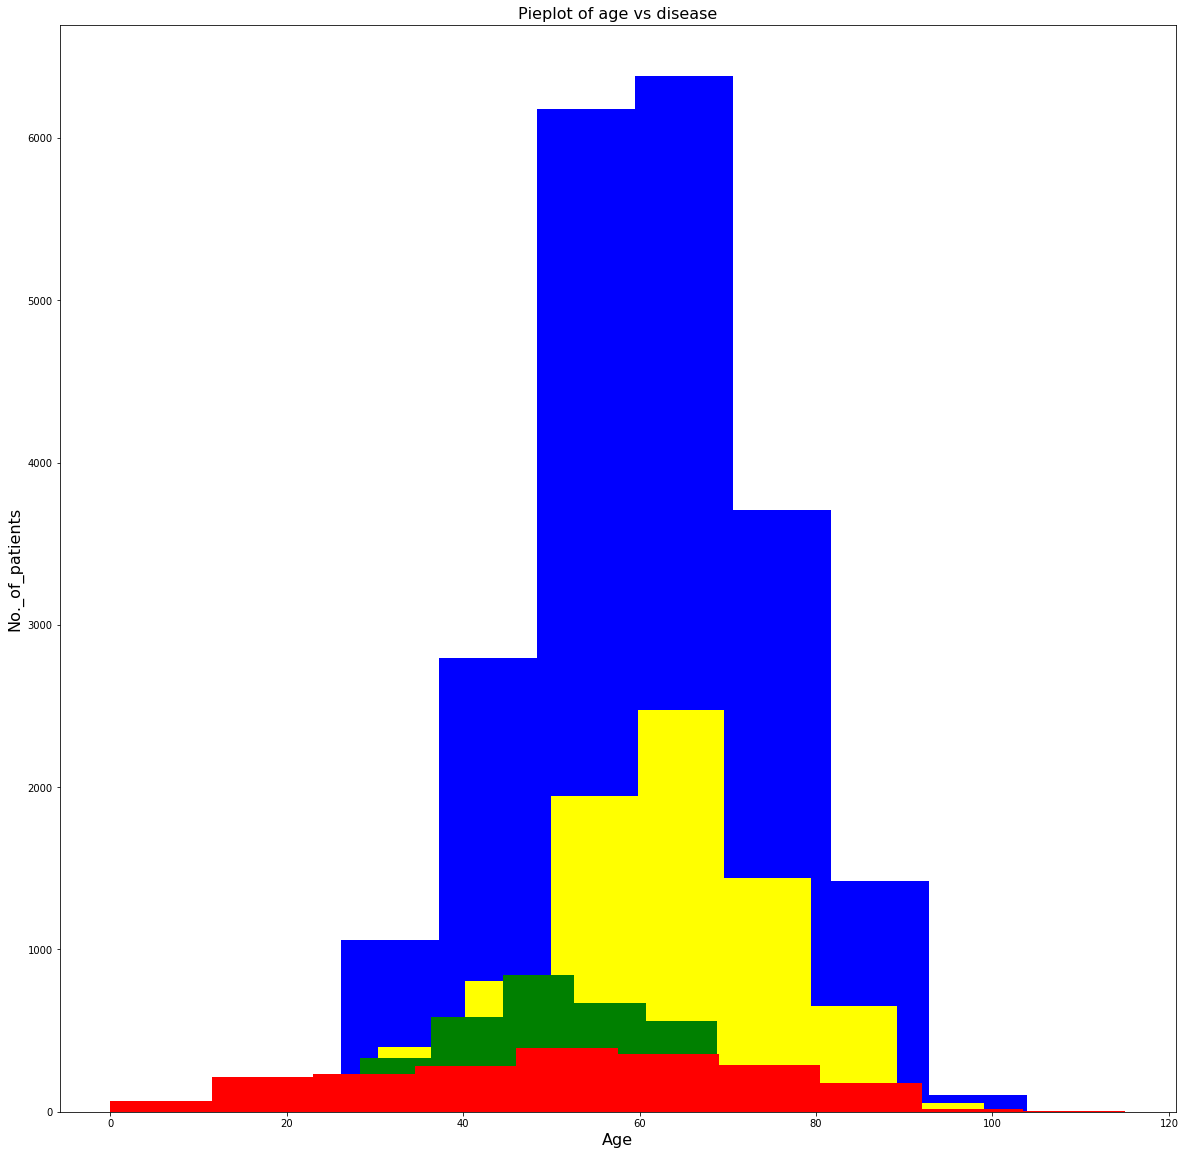

In [69]:
df_hi['Age'].plot(kind='hist',figsize=(20,20),color='blue')
df_d['Age'].plot(kind='hist',figsize=(20,20),color='yellow')
df_a['Age'].plot(kind='hist',figsize=(20,20),color='green')
df_ha['Age'].plot(kind='hist',figsize=(20,20),color='red')
plt.xlabel('Age',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of age vs disease", fontsize=16)

In [ ]:
2.1.1 people with age around 60 are high risk group of Hipertension & Diabetes, these 2 disease have strong correlation.
2.1.2 people with age around 50 are high risk group of Handcaps & alcoholism.  

Text(0.5,1,'Pieplot of Gender vs No. of Hipertension Patients')

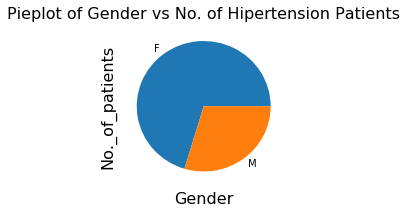

In [70]:
df_hi['Gender'].value_counts().plot(kind='pie',figsize=(3,3));
plt.xlabel('Gender',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of Gender vs No. of Hipertension Patients", fontsize=16)

Text(0.5,1,'Pieplot of Gender vs No. of Diabate Patients')

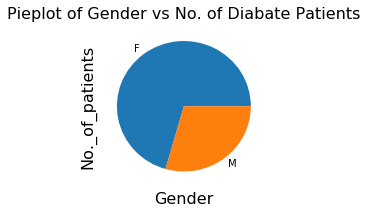

In [71]:
df_d['Gender'].value_counts().plot(kind='pie',figsize=(3,3));
plt.xlabel('Gender',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of Gender vs No. of Diabate Patients", fontsize=16)

Text(0.5,1,'Pieplot of Gender vs No. of Alcoholis Patients')

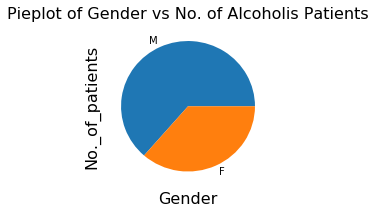

In [72]:
df_a['Gender'].value_counts().plot(kind='pie',figsize=(3,3));
plt.xlabel('Gender',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of Gender vs No. of Alcoholis Patients", fontsize=16)

Text(0.5,1,'Pieplot of Gender vs No. of Handcap Patients')

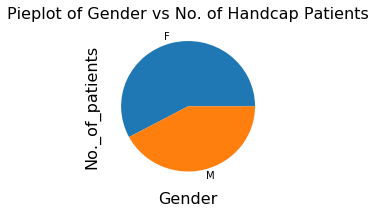

In [74]:
df_ha['Gender'].value_counts().plot(kind='pie',figsize=(3,3));
plt.xlabel('Gender',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of Gender vs No. of Handcap Patients", fontsize=16)

2.2.1 Female has higher risks for Hipertension & Diabetes
2.2.2 while male has higher risk for alcoholism

Text(0.5,1,'Pieplot of Neighbourhood vs No.of HipertensionPatients')

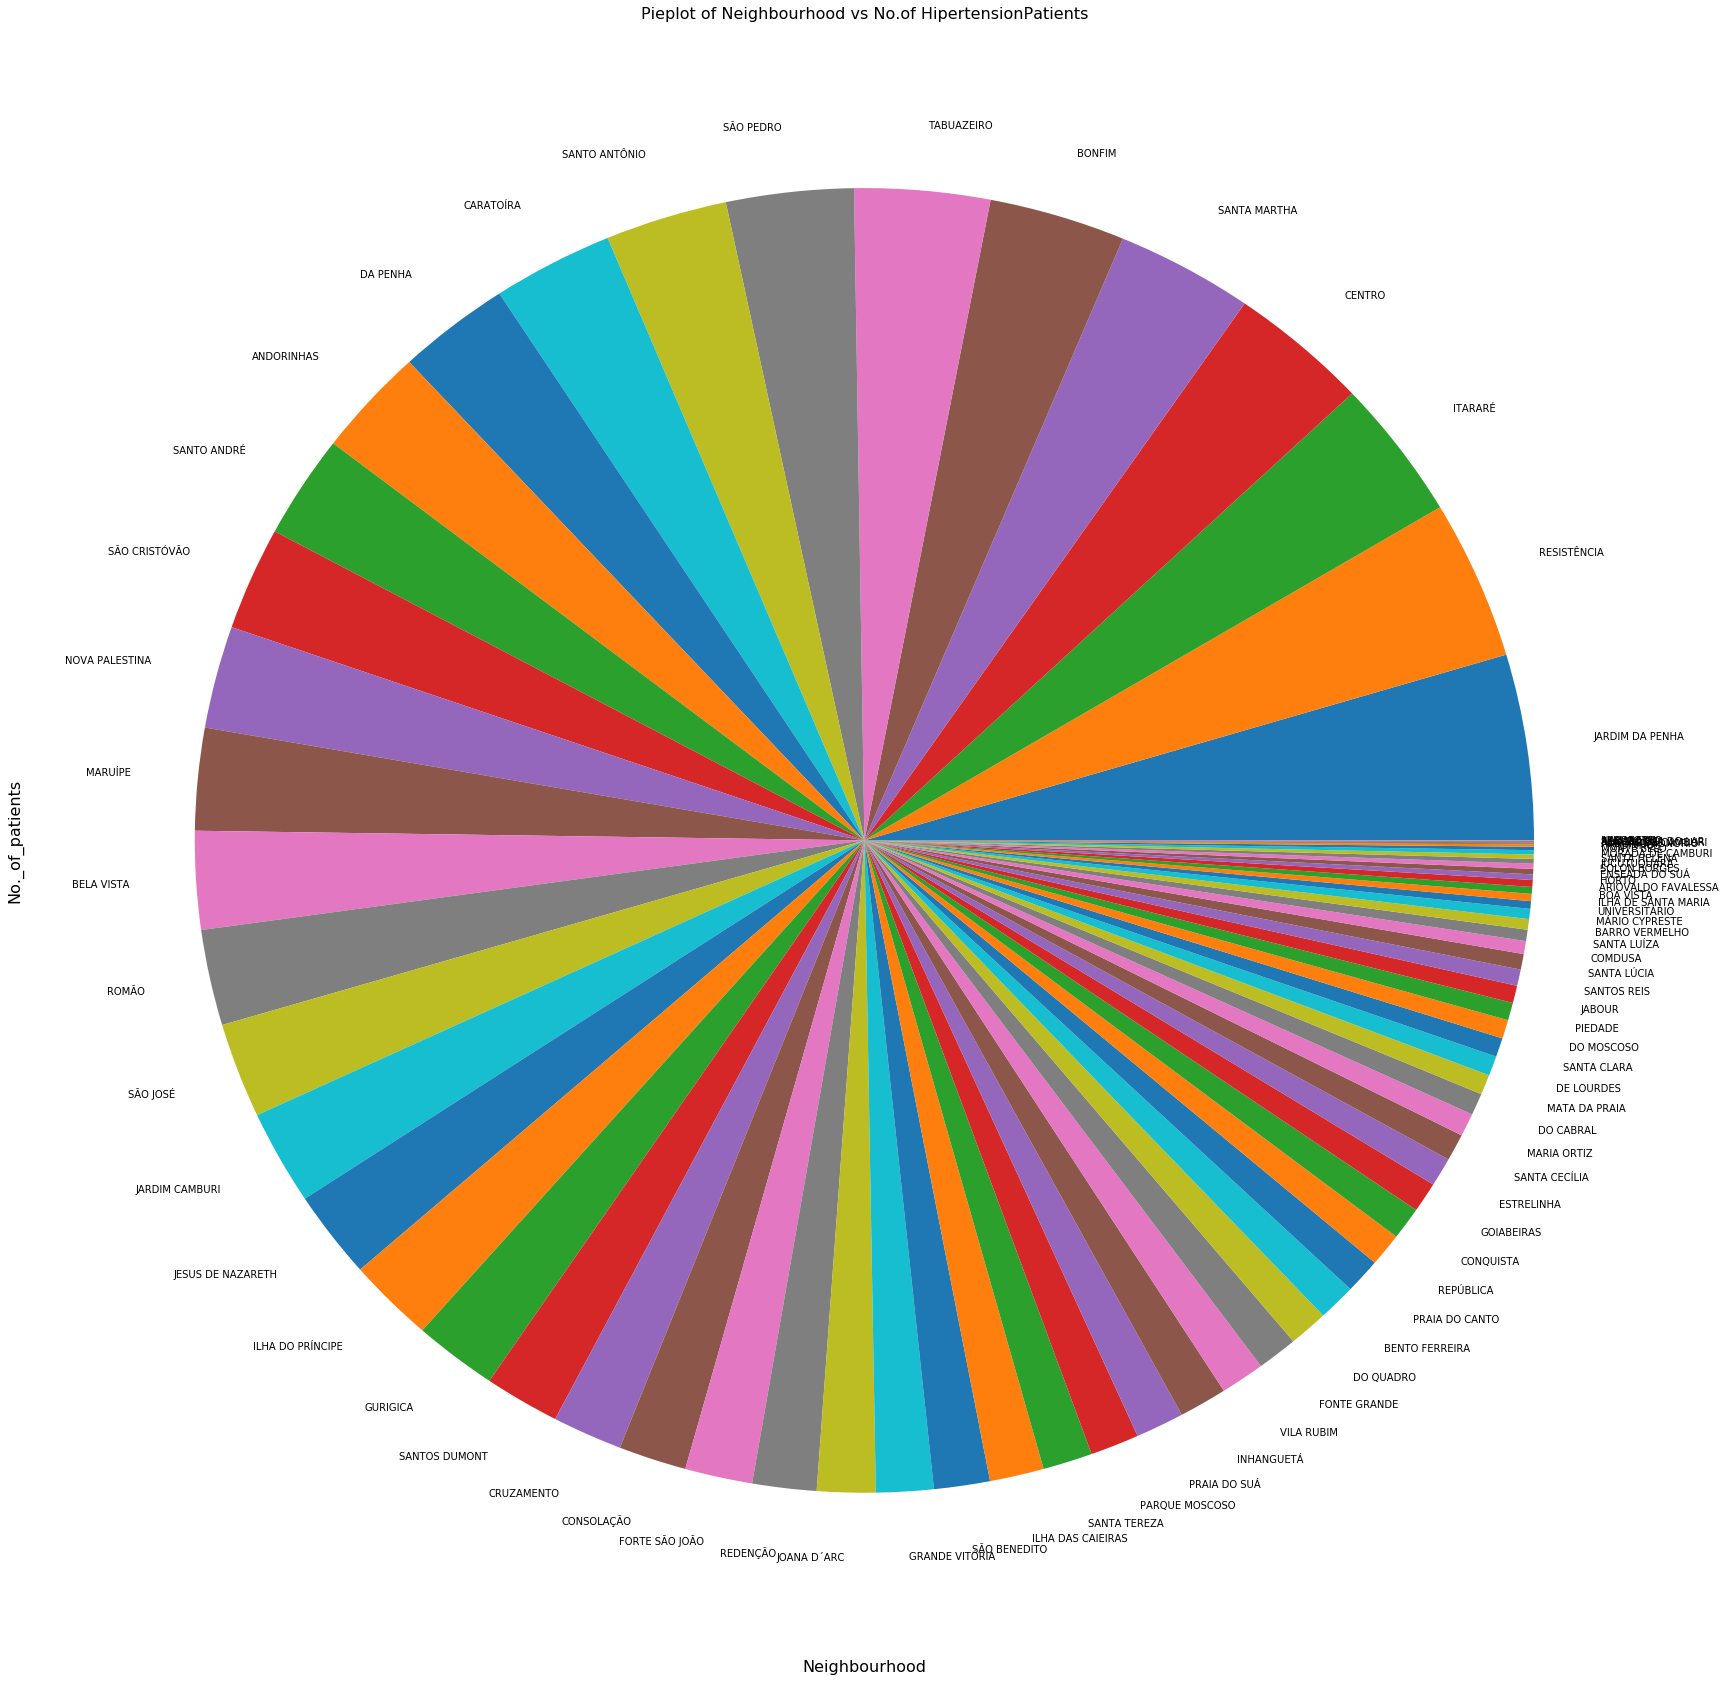

In [76]:
df_hi['Neighbourhood'].value_counts().plot(kind='pie',figsize=(30,30));
plt.xlabel('Neighbourhood',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of Neighbourhood vs No.of HipertensionPatients", fontsize=16)

Text(0.5,1,'Pieplot of Neighbourhood vs No. of Diabate Patients')

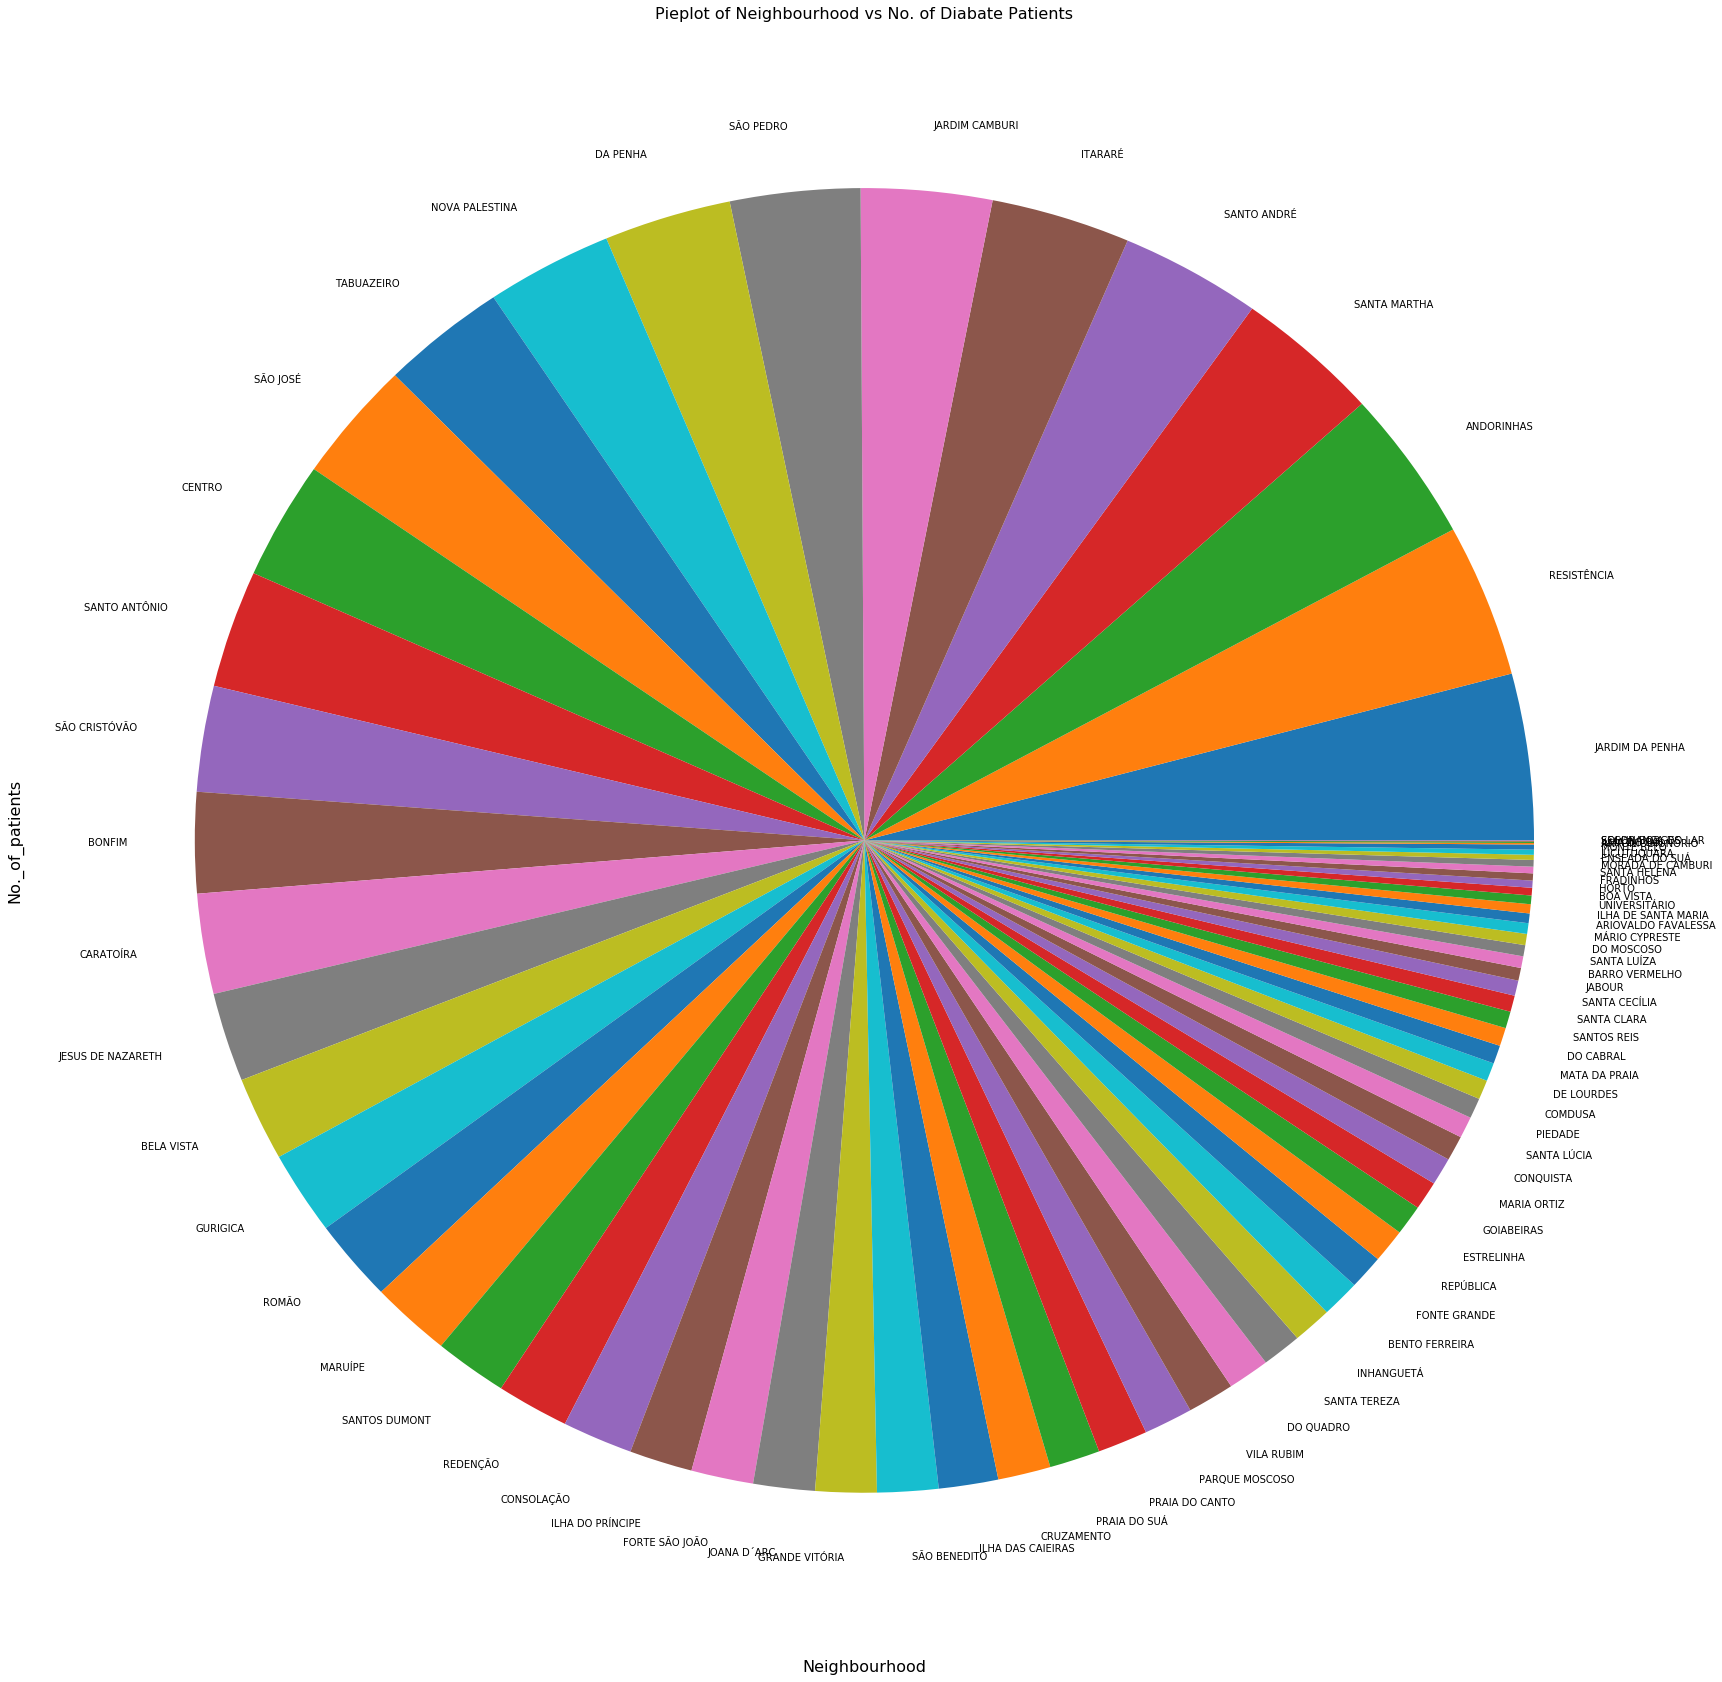

In [77]:
df_d['Neighbourhood'].value_counts().plot(kind='pie',figsize=(30,30));
plt.xlabel('Neighbourhood',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of Neighbourhood vs No. of Diabate Patients", fontsize=16)

Text(0.5,1,'Pieplot of Gender vs No. of Alcoholism Patients')

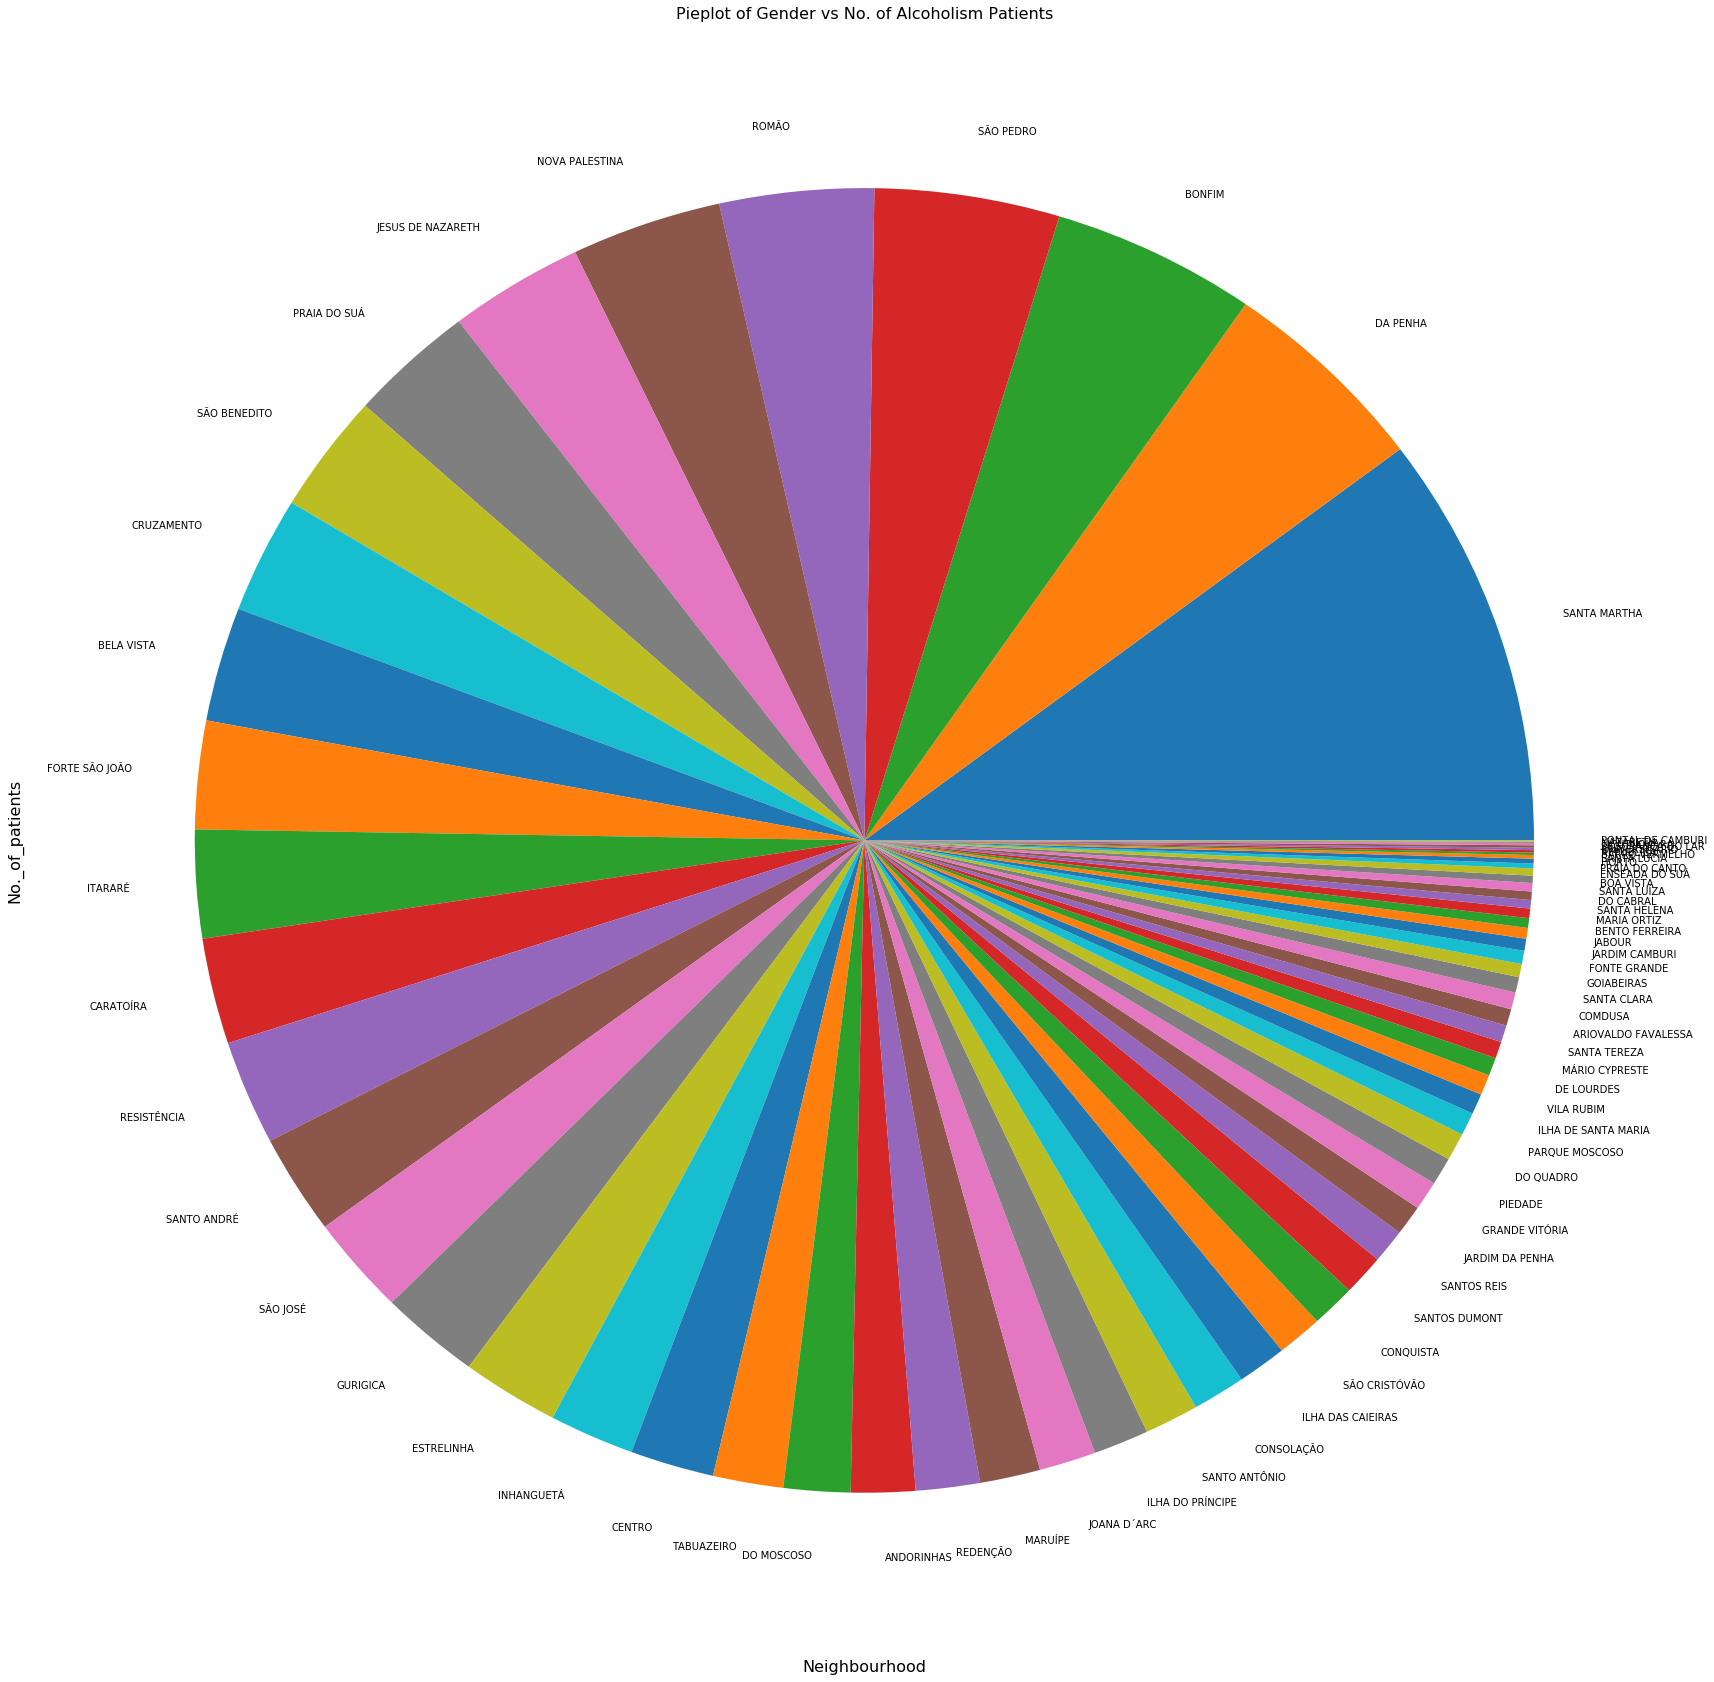

In [78]:
df_a['Neighbourhood'].value_counts().plot(kind='pie',figsize=(30,30));
plt.xlabel('Neighbourhood',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of Gender vs No. of Alcoholism Patients", fontsize=16)

Text(0.5,1,'Pieplot of Gender vs No. of Handcap Patients')

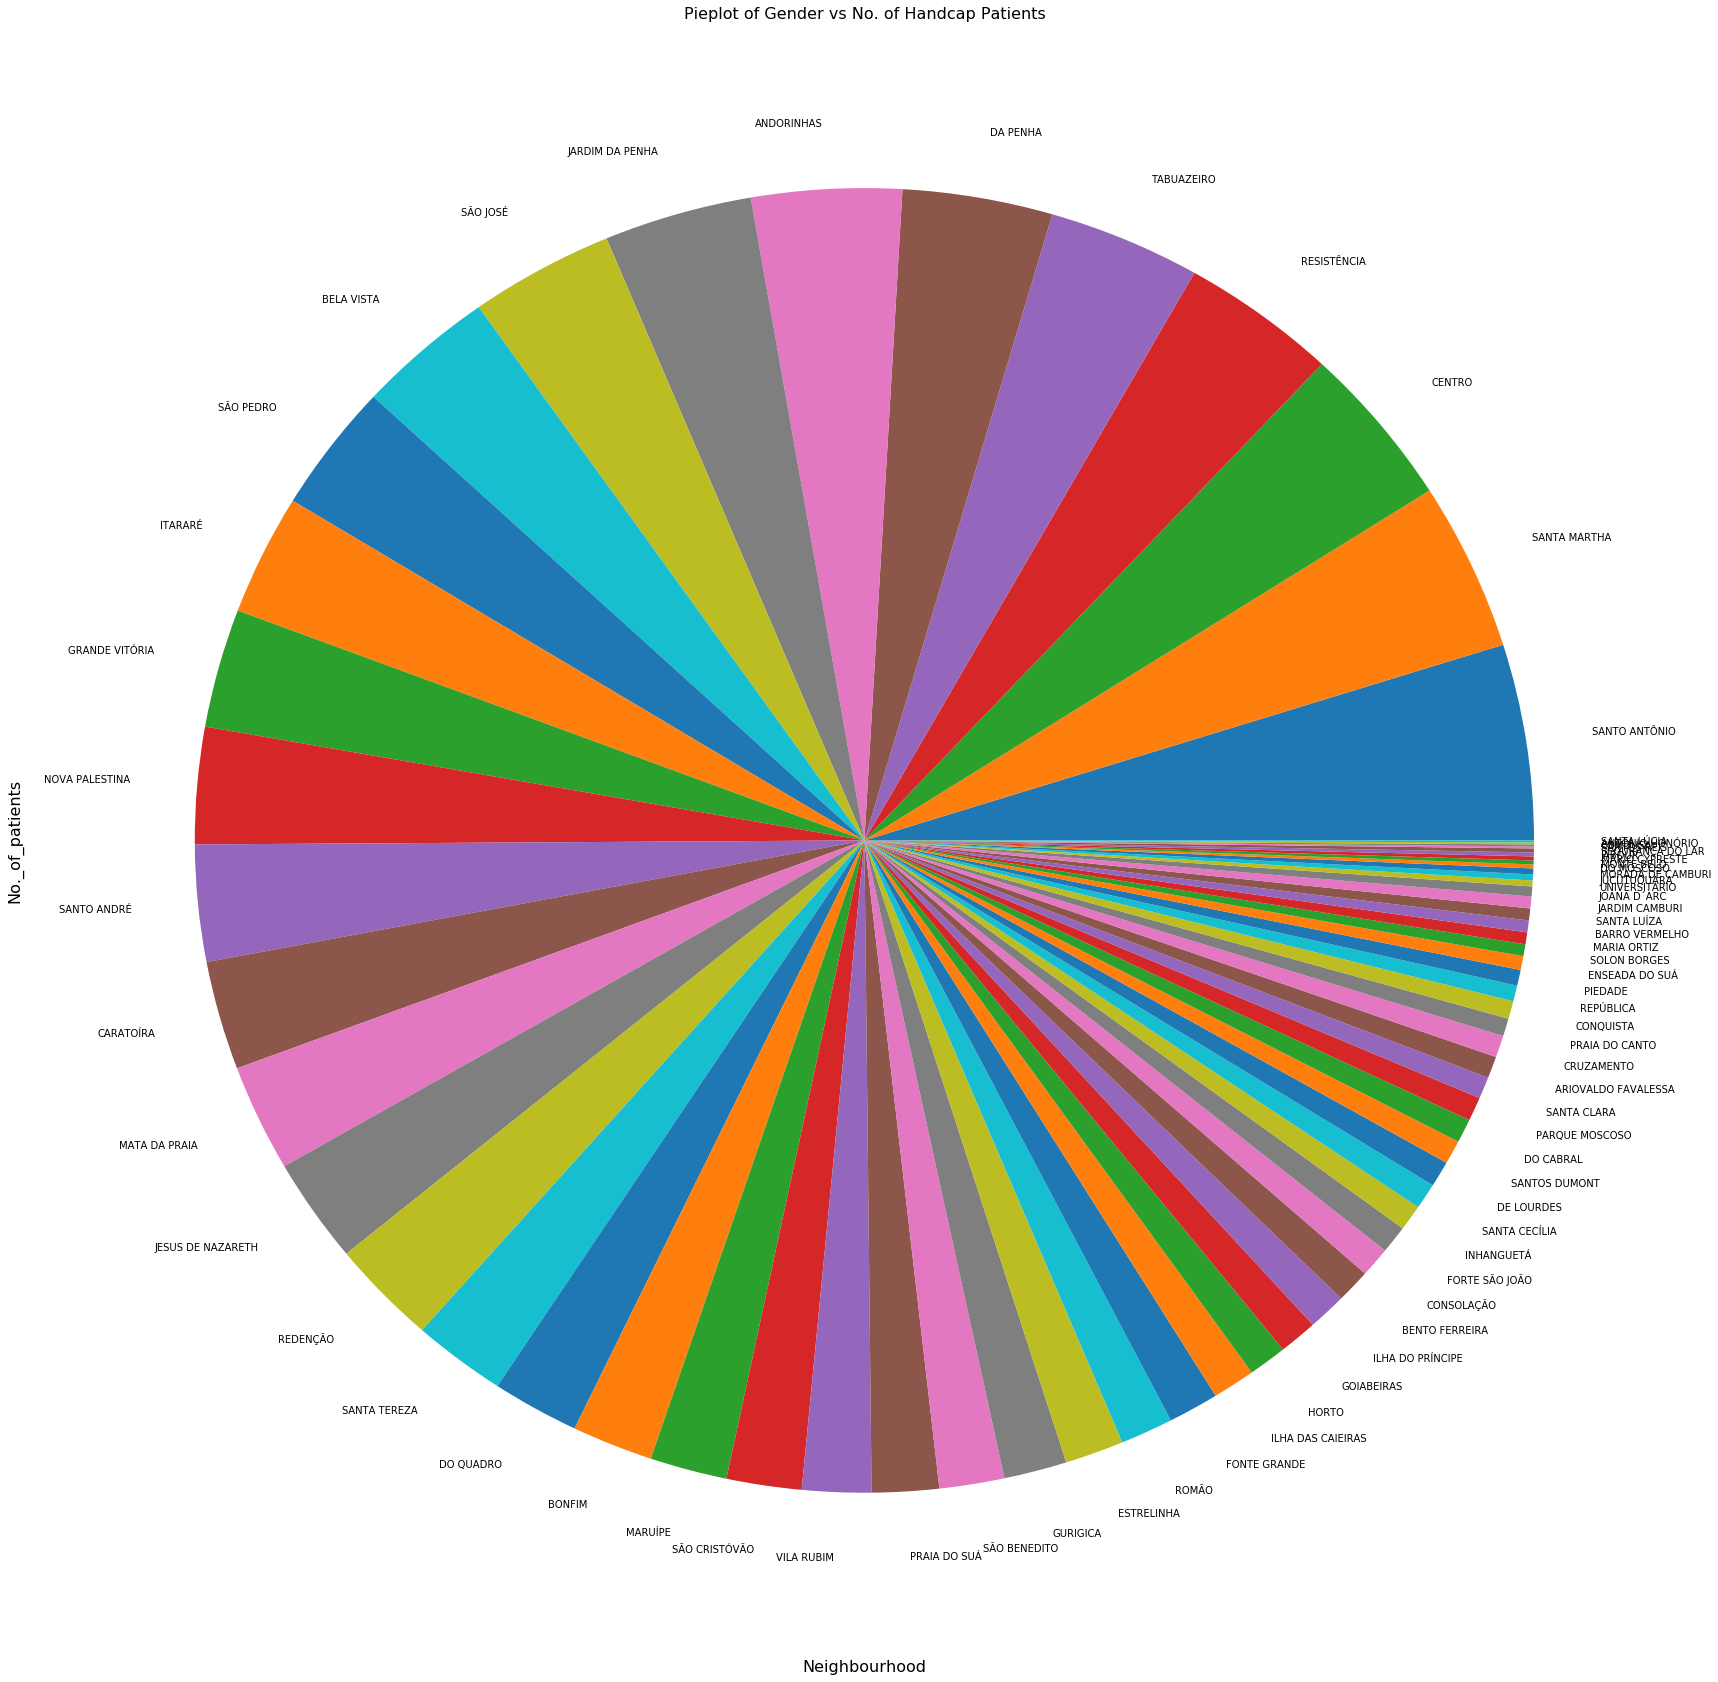

In [79]:
df_ha['Neighbourhood'].value_counts().plot(kind='pie',figsize=(30,30));
plt.xlabel('Neighbourhood',fontsize = 16); plt.ylabel('No._of_patients',fontsize = 16);
plt.title("Pieplot of Gender vs No. of Handcap Patients", fontsize=16)

2.3.1 JARDIM DA PENHA and RESISTÃŠNCIA districts are highspots of Hipertension & Diabetes
2.3.2 SANTO ANTÃ”NIO & Santa Martha are highspots of alcoholism & handcap

<a id='conclusions'></a>
## 结论

This analysis scope is limited to prilimary qualitative result and 1st step draft analysis result due to 
1. lack of information with public health condition around the neighbourhood, age distribution, population in this city.
2. large size of illogical day internval data.
Below 1st insights from data analysis:
1. Brasilian patients appointments behabior analysis shows that age & weekdays play a role for no show(with younger or working days has higher no show risks), gender plays a role for appointment booking in advance(female make appointsment earlier). Booking appointment in advance tend to have a positive performance in terms of no show

2. Age, gender as well as neighbourhood are factors to differ disease distribution.


In [142]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255